In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [64]:
def kmeans(X, n_centers=3, max_iter=300):
    random_indices = np.random.choice(X.shape[0], n_centers)
    centroids = X[random_indices]
    labels = np.argmin(cdist(X, centroids), axis=1)
    for _ in range(max_iter):
        old_centroids = centroids
        dist = cdist(X, centroids)
        labels = np.argmin(dist, axis=1)
        centroids = np.array([X[labels == i].mean(0) for i in range(n_centers)])
        if np.all(centroids == old_centroids):
            break
    return centroids, labels

In [85]:
def test_correctness(n_samples=1000, n_features=2, cluster_std=3.0, n_centers=3, random_state=42):
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, cluster_std=cluster_std, centers=n_centers, random_state=random_state)
    actual_centers, actual_labels = kmeans(X, n_centers=n_centers)
    
    km_instance = KMeans(n_clusters=n_centers).fit(X)
    expected_centers = km_instance.cluster_centers_
    expected_labels = km_instance.labels_
    
    assert actual_centers.shape[0] == n_centers
    assert X.shape[0] == actual_labels.shape[0]

    unique_labels = np.unique(expected_labels)

    for i in unique_labels:
        plt.scatter(X[expected_labels == i, 0] , X[expected_labels == i, 1], label=i)
    plt.scatter(actual_centers[:, 0] , actual_centers[:, 1] , s = 60, color = 'k')
    #plt.scatter(expected_centers[:, 0] , expected_centers[:, 1] , s = 80, color = 'k')
    plt.legend()
    plt.show()
    
    np.testing.assert_allclose(actual_centers, expected_centers, atol=3*np.std(X), verbose=True)

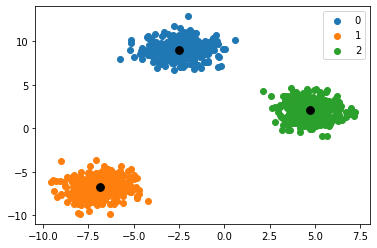

In [86]:
test_correctness(n_samples=1000, n_features=2, cluster_std=1, n_centers=3)